This tutorial includes some plotting functions. These 

# Imports

In [3]:
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

# Functions

In [3]:
def plot_anomalies(X, y_pred):
    """ Plot the anomalies """
    
    marker_style = {1.0: 'o', -1.0: 'x'}
    color_style = {1.0: 'red', -1.0: 'blue'}
    
    plt.figure(figsize=(6, 6))
    for i, x in enumerate(X):
        plt.plot(x[0], x[1], marker_style[y_pred[i]], color=color_style[y_pred[i]])
    plt.show()

In [4]:
def plot_classifier_contour_2D(clf, X, y=np.array([]), xmin=0.0, xmax=1.0, ymin=0.0, ymax=1.0, h=0.02, auto_range=False):
    """ Plot a contour plot for classifier """
    
    # make the meshgrid
    if auto_range:
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    else:
        x_min, x_max = xmin, xmax
        y_min, y_max = ymin, ymax
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Xtest = np.c_[xx.ravel(), yy.ravel()]
    
    # fit and predict
    if len(y) == 0:
        clf.fit(X)
    else:
        clf.fit(X, y)
    Z, _ = clf.predict(Xtest)
    Z = Z.reshape(xx.shape)
    
    # plot the heatmap and the normal points
    plt.figure(figsize=(7, 6))
    plt.scatter(X[:, 0], X[:, 1], cmap=plt.cm.coolwarm, s=40, edgecolors='k')
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.colorbar()
    plt.contour(xx, yy, Z, np.linspace(0.0, np.max(Z), 10))
    plt.show()

# Generate data

Generate a small toy dataset from 3 multivariate Gaussians. Plot the data.

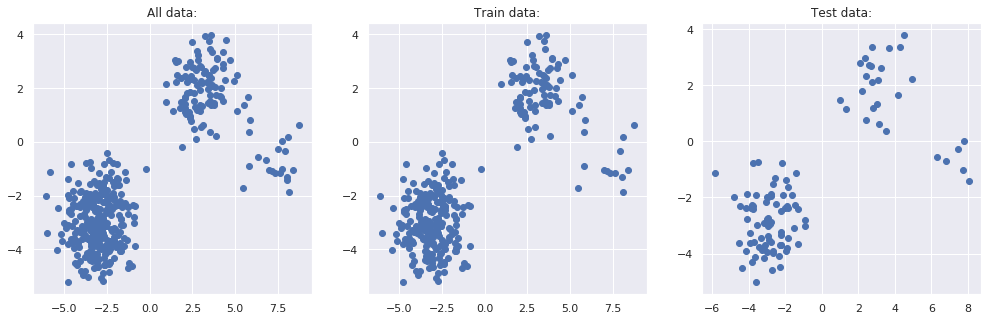

In [5]:
X = np.vstack((np.random.multivariate_normal([-3, -3], [[1, 0], [0, 1]], 300),
               np.random.multivariate_normal([3, 2], [[1, 0], [0, 1]], 100),
               np.random.multivariate_normal([8, -1], [[1, 0], [0, 1]], 20)))
np.random.shuffle(X)
n, _ = X.shape

X_train = X[:int(n * 0.75), :]
X_test = X[int(n * 0.75):, :]

fig, axes = plt.subplots(1, 3, figsize=(17, 5))
axes[0].plot(X[:, 0], X[:, 1], 'o')
axes[0].set_title('All data:')
axes[1].plot(X_train[:, 0], X_train[:, 1], 'o')
axes[1].set_title('Train data:')
axes[2].plot(X_test[:, 0], X_test[:, 1], 'o')
axes[2].set_title('Test data:')
plt.show()

We can clearly see the three clusters in the data. Let's call them: cluster 1, 2, and 3 for respectively the cluster with 100, 50, and 10 instances.

# Detect outliers

## Unsupervised SSDO

First, lets detect outliers using SSDO without providing any label information. We suspect about 10 percent of the data to be anomalous.

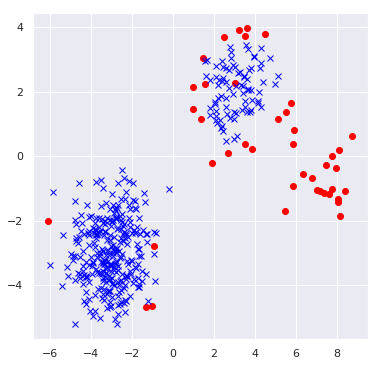

In [7]:
# no labels
y = np.zeros(len(X))

# construct detector and find outliers
detector = SSDO(contamination=0.1, base_classifier='ssdo')
y_score, y_pred = detector.fit_predict(X, y)

# plot anomalies
plot_anomalies(X, y_pred)

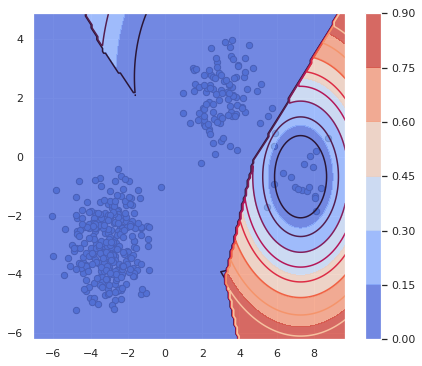

In [8]:
# draw decision boundary
detector = SSDO(contamination=0.1, base_classifier='ssdo')
plot_classifier_contour_2D(detector, X, y, h=0.1, auto_range=True)

## Semi-supervised SSDO with SSDO unsupervised prior

Now let us provide some labels: we, as user, know that cluster 3 is in fact normal, while cluster 2 is anomalous. We can give this information to SSDO. This time, there are actually more anomalies in the data because cluster 2 is larger than cluster 1.

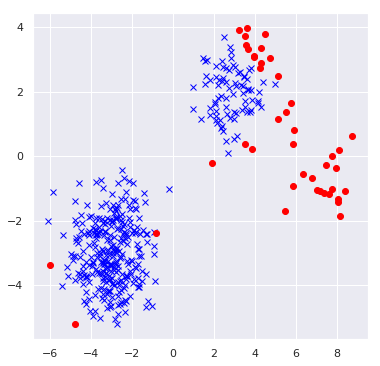

In [10]:
# let's add labels
y = np.zeros(len(X), dtype=int)
y[-5:] = -1
y[-40:-35] = 1

# construct detector and find outliers
detector = SSDO(contamination=0.1, base_classifier='ssdo')
y_score, y_pred = detector.fit_predict(X, y)

# plot anomalies
plot_anomalies(X, y_pred)

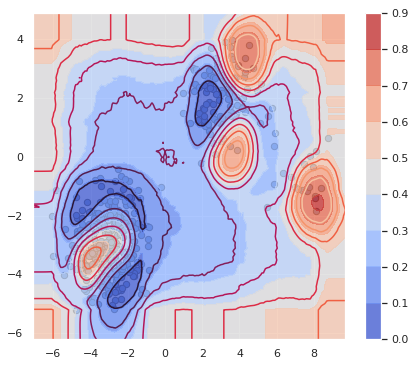

In [11]:
# draw decision boundary
detector = SSDO(contamination=0.1, base_classifier='IF')
plot_classifier_contour_2D(detector, X, y, h=0.1, auto_range=True)

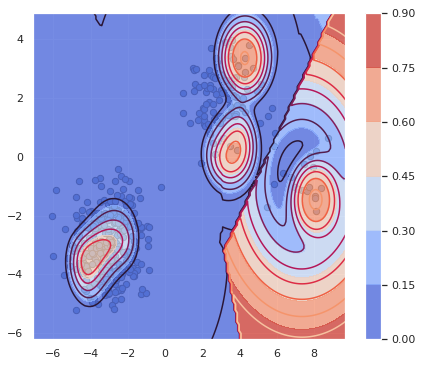

In [12]:
# draw decision boundary
detector = SSDO(contamination=0.1, base_classifier='ssdo')
plot_classifier_contour_2D(detector, X, y, h=0.1, auto_range=True)

## Semi-supervised SSDO with IsolationForest as the unsupervised classifier

Now we use the prior from iForest in combination with the label information to compute the final anomaly scores.

In [13]:
# no labels
y = np.zeros(len(X))

# construct detector and find outliers
detector = SSDO(contamination=0.1, base_classifier='IF')
y_score, y_pred = detector.fit_predict(X, y)

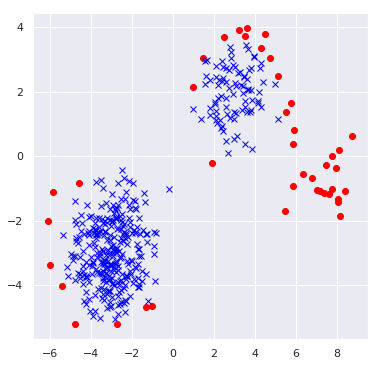

In [14]:
# plot anomalies
plot_anomalies(X, y_pred)

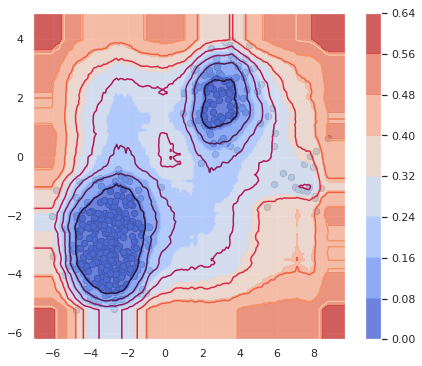

In [15]:
# draw decision boundary
detector = SSDO(contamination=0.1, base_classifier='IF')
plot_classifier_contour_2D(detector, X, h=0.1, auto_range=True)